# This is the final notebook used for Machine Learning with feature engineering and scaling 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Read the csv file into a pandas DataFrame
results = pd.read_csv('clean_datasets/merged_results.csv')
results.head()

,state,year,obesity_percentage,tobacco_percentage,per capita income,Deaths
0,Alabama,2011,32.10,24.3,34997,48681
1,Alabama,2012,33.07,23.8,35884,49301
2,Alabama,2013,32.59,21.5,36107,50189
3,Alabama,2014,33.57,21.1,37266,50215
4,Alabama,2015,35.67,21.4,38644,51909


In [6]:
#Sum per capita income 
mean_income=results["per capita income"].sum()
mean_income

13580064

In [7]:
# Create formula to get percent of total income
percent_total_income=(results["per capita income"]/mean_income)*100
percent_total_income

0      0.257709
1      0.264240
2      0.265882
3      0.274417
4      0.284564
         ...   
295    0.394159
296    0.389483
297    0.417583
298    0.420477
299    0.402134
Name: per capita income, Length: 300, dtype: float64

In [8]:
#Turn into DataFrame
percent_income=pd.DataFrame(percent_total_income)
percent_income

,per capita income
0,0.257709
1,0.264240
2,0.265882
3,0.274417
4,0.284564
...,...
295,0.394159
296,0.389483
297,0.417583
298,0.420477


In [9]:
#Rename Column 
results['percent_income']=percent_income
results

,state,year,obesity_percentage,tobacco_percentage,per capita income,Deaths,percent_income
0,Alabama,2011,32.10,24.3,34997,48681,0.257709
1,Alabama,2012,33.07,23.8,35884,49301,0.264240
2,Alabama,2013,32.59,21.5,36107,50189,0.265882
3,Alabama,2014,33.57,21.1,37266,50215,0.274417
4,Alabama,2015,35.67,21.4,38644,51909,0.284564
...,...,...,...,...,...,...,...
295,Wyoming,2012,24.58,21.8,53527,4481,0.394159
296,Wyoming,2013,27.59,20.6,52892,4516,0.389483
297,Wyoming,2014,29.17,19.5,56708,4666,0.417583
298,Wyoming,2015,28.81,19.1,57101,4778,0.420477


In [10]:
#Drop per capita income column 
results.drop(['per capita income'], axis=1)

,state,year,obesity_percentage,tobacco_percentage,Deaths,percent_income
0,Alabama,2011,32.10,24.3,48681,0.257709
1,Alabama,2012,33.07,23.8,49301,0.264240
2,Alabama,2013,32.59,21.5,50189,0.265882
3,Alabama,2014,33.57,21.1,50215,0.274417
4,Alabama,2015,35.67,21.4,51909,0.284564
...,...,...,...,...,...,...
295,Wyoming,2012,24.58,21.8,4481,0.394159
296,Wyoming,2013,27.59,20.6,4516,0.389483
297,Wyoming,2014,29.17,19.5,4666,0.417583
298,Wyoming,2015,28.81,19.1,4778,0.420477


In [11]:
#Reorder columns 
new_df=results[['state', 'year', 'obesity_percentage', 'tobacco_percentage', 'percent_income', 'Deaths']]
new_df

,state,year,obesity_percentage,tobacco_percentage,percent_income,Deaths
0,Alabama,2011,32.10,24.3,0.257709,48681
1,Alabama,2012,33.07,23.8,0.264240,49301
2,Alabama,2013,32.59,21.5,0.265882,50189
3,Alabama,2014,33.57,21.1,0.274417,50215
4,Alabama,2015,35.67,21.4,0.284564,51909
...,...,...,...,...,...,...
295,Wyoming,2012,24.58,21.8,0.394159,4481
296,Wyoming,2013,27.59,20.6,0.389483,4516
297,Wyoming,2014,29.17,19.5,0.417583,4666
298,Wyoming,2015,28.81,19.1,0.420477,4778


In [12]:
col_list= list(new_df)
col_list.remove('state')
col_list.remove('year')
col_list.remove('Deaths')
col_list

['obesity_percentage', 'tobacco_percentage', 'percent_income']

In [13]:
new_df['Sum'] = new_df[col_list].sum(axis = 1)
new_df

,state,year,obesity_percentage,tobacco_percentage,percent_income,Deaths,Sum
0,Alabama,2011,32.10,24.3,0.257709,48681,56.657709
1,Alabama,2012,33.07,23.8,0.264240,49301,57.134240
2,Alabama,2013,32.59,21.5,0.265882,50189,54.355882
3,Alabama,2014,33.57,21.1,0.274417,50215,54.944417
4,Alabama,2015,35.67,21.4,0.284564,51909,57.354564
...,...,...,...,...,...,...,...
295,Wyoming,2012,24.58,21.8,0.394159,4481,46.774159
296,Wyoming,2013,27.59,20.6,0.389483,4516,48.579483
297,Wyoming,2014,29.17,19.5,0.417583,4666,49.087583
298,Wyoming,2015,28.81,19.1,0.420477,4778,48.330477


In [14]:
col_list2= list(new_df)
col_list2.remove('state')
col_list2.remove('year')
col_list2.remove('Deaths')
col_list2.remove('Sum')
col_list2

['obesity_percentage', 'tobacco_percentage', 'percent_income']

In [15]:
new_df['Mean'] = new_df[col_list2].mean(axis = 1)
new_df

,state,year,obesity_percentage,tobacco_percentage,percent_income,Deaths,Sum,Mean
0,Alabama,2011,32.10,24.3,0.257709,48681,56.657709,18.885903
1,Alabama,2012,33.07,23.8,0.264240,49301,57.134240,19.044747
2,Alabama,2013,32.59,21.5,0.265882,50189,54.355882,18.118627
3,Alabama,2014,33.57,21.1,0.274417,50215,54.944417,18.314806
4,Alabama,2015,35.67,21.4,0.284564,51909,57.354564,19.118188
...,...,...,...,...,...,...,...,...
295,Wyoming,2012,24.58,21.8,0.394159,4481,46.774159,15.591386
296,Wyoming,2013,27.59,20.6,0.389483,4516,48.579483,16.193161
297,Wyoming,2014,29.17,19.5,0.417583,4666,49.087583,16.362528
298,Wyoming,2015,28.81,19.1,0.420477,4778,48.330477,16.110159


In [16]:
new_df2 = pd.get_dummies(new_df, prefix=['state'], columns=['state'])
new_df2

,year,obesity_percentage,tobacco_percentage,percent_income,Deaths,Sum,Mean,state_Alabama,state_Alaska,state_Arizona,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,2011,32.10,24.3,0.257709,48681,56.657709,18.885903,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,33.07,23.8,0.264240,49301,57.134240,19.044747,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,32.59,21.5,0.265882,50189,54.355882,18.118627,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,33.57,21.1,0.274417,50215,54.944417,18.314806,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,35.67,21.4,0.284564,51909,57.354564,19.118188,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2012,24.58,21.8,0.394159,4481,46.774159,15.591386,0,0,0,...,0,0,0,0,0,0,0,0,0,1
296,2013,27.59,20.6,0.389483,4516,48.579483,16.193161,0,0,0,...,0,0,0,0,0,0,0,0,0,1
297,2014,29.17,19.5,0.417583,4666,49.087583,16.362528,0,0,0,...,0,0,0,0,0,0,0,0,0,1
298,2015,28.81,19.1,0.420477,4778,48.330477,16.110159,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
new_df3 = pd.get_dummies(new_df2, prefix=['year'], columns=['year'])
new_df3

,obesity_percentage,tobacco_percentage,percent_income,Deaths,Sum,Mean,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,...,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,32.10,24.3,0.257709,48681,56.657709,18.885903,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,33.07,23.8,0.264240,49301,57.134240,19.044747,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,32.59,21.5,0.265882,50189,54.355882,18.118627,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,33.57,21.1,0.274417,50215,54.944417,18.314806,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,35.67,21.4,0.284564,51909,57.354564,19.118188,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,24.58,21.8,0.394159,4481,46.774159,15.591386,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
296,27.59,20.6,0.389483,4516,48.579483,16.193161,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
297,29.17,19.5,0.417583,4666,49.087583,16.362528,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
298,28.81,19.1,0.420477,4778,48.330477,16.110159,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
# Assign the data to X and y

X = new_df3[["obesity_percentage", "tobacco_percentage", "percent_income", "Sum", "Mean", 'state_Alabama', 'state_Alaska',
            'state_Arizona', 'state_Arkansas', 'state_California', 'state_Colorado', 'state_Connecticut', 'state_Delaware',
            'state_Georgia', 'state_Hawaii', 'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa', 'state_Kansas',
            'state_Kentucky', 'state_Louisiana','state_Washington', 'state_West Virginia', 'state_Wisconsin', 'state_Wyoming',
            'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016']]

y = new_df3[["Deaths"]].values.reshape(-1,1)

print(X.shape, y.shape)

(300, 32) (300, 1)


In [19]:
# Create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [20]:
# Create a StandardScater model and fit to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Use the X_scaler/y_scaler to transform
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [21]:
# Create LinearRegression model and fit to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Score data based on scaled model
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3970845959485937
Testing Score: 0.5609713397035138


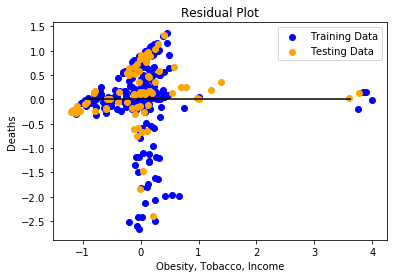

<Figure size 432x288 with 0 Axes>

In [23]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.gca().set(xlabel='Obesity, Tobacco, Income', ylabel='Deaths')
plt.show()

plt.savefig("static/images/residual_plots.png", bbox_inches='tight')

plt.show()

In [24]:
# Calculate MSE & R2 
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3911126309450178, R2: 0.5609713397035138


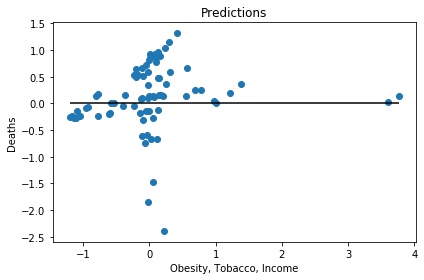

In [30]:
#Plot residuals
plt.scatter(predictions, predictions - y_test_scaled)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Predictions")

plt.gca().set(xlabel='Obesity, Tobacco, Income', ylabel='Deaths')
plt.tight_layout() 

plt.savefig("static/images/predictions.png", bbox_inches='tight')
plt.show()